## Данные Фонда Президентских Грантов 

Датасет содержит информацию о заявках на предоставление грантов Президента РФ для реализации проектов по направлениям поддерживаемым Фондом за период с 2017 по 2021 гг.<br>
Источник: https://xn--80afcdbalict6afooklqi5o.xn--p1ai/public/application/cards (дата обращения 12.03.21)

**Описание полей:**<br>

1.url - ссылка на страницу проекта на сайте Фонда<br>
2.title - название проекта<br>
3.contest - конкурс, на который был заявлен проект<br>
4.direction - конкурсное направление<br>
5.grant - размер запрашиваемого гранта<br>
6.region - регион, из которого поступила заявка<br>
7.status - статус заявки (победитель / проект не получил поддержку / на независимой экспертизе)<br>
8.date - дата поступления заявки<br>
9.id - id заявки<br>

**Summary**

1. За 5 лет деятельности Фонда с 2017 по 2021 гг. было организовано 10 конкурсов, на которые подано в сумме более 80 тыс. заявок. 
2. Больше всего заявок за время работы Фонда поступило из Москвы, Санкт-Петербурга, Волгоградской области, Башкортостана и Татарстана. При этом самыми активными регионами можно считать Алтай, Ненецкий автономный округ, Белгородскую, Волгоградскую области и Карелию, где на 10 тыс. жителей приходится более 14 заявок. В 5-ке самых "пассивных" регионов оказался юг России - Дагестан, Адыгея, Чечня, Краснодарский край, Астраханская область.   
3. Самое популярное конкурсное направление - *Охрана здоровья граждан, пропаганда здорового образа жизни*. Категория занимает первое место по количеству заявок в каждый из конкурсных годов, а её доля в общем количестве заявок ежегодно растёт. Меньше всего желающих реализовать проекты в направлениях: *Выявление и поддержка молодых талантов в области культуры и искусства*, *Защита прав и свобод человека и гражданина, в том числе защита прав заключенных*, *Развитие общественной дипломатии и поддержка соотечественников*. <br>В 2020-м году по кол-ву заявок сильнее всего выросли такие направления как *Сохранение исторической памяти* и *Охрана окружающей среды и защита животных*: +30% YoY каждое. Если рост первого направления очевидно отражает политическую повестку в стране (2020-й год был объявлен «Годом памяти и Славы» в честь 75-летия Победы в ВОВ), то запрос на эко-тематику скорее резонирует с мировым трендом на заботу об окружающей среде, выстрелившим в 2019-м (2019-й называют «годом sustainability») и продолжившим развиваться в 2020-м.
4. Половина всех заявок подаётся на гранты размером до 1,4 млн руб., только в 1% всех проектов размер запрашиваемых грантов превышает 17,3 млн руб. Вместе с ежегодным ростом количества подаваемых заявок медианное значение размера гранта снижается, т.е. к участию в конкурсе подключается больше организаций, но с более мелкими проектами.<br>Топ-5 победителей с самыми крупными запрашиваемыми грантами за все время работы Фонда подавали заявки в категории *Выявление и поддержка молодых талантов в области культуры и искусства* (при этом по кол-ву заявок это направление самое малочисленное!). 2 из 5 побед принадлежат проекту Юрия Башмета, ещё две - "Ассоциации учебных заведений искусства и культуры".*
5. В среднем одобряется только 5-ая часть подаваемых на конкурс заявок. Больше всего заявок было одобрено во втором конкурсе 2017 года - 27%, меньше всего в первом конкурсе 2017 года и втором конкурсе 2018 года - по 19%.<br>Вероятность выйграть грант значимо выше в направлениях: *Выявление и поддержка молодых талантов в области культуры и искусства*, *Охрана окружающей среды и защита животных*, *Социальное обслуживание, социальная поддержка и защита граждан*. Значимо ниже шансы в направлениях: *Поддержка молодежных проектов*, *Поддержка проектов в области науки, образования, просвещения*, *Развитие институтов гражданского общества*, *Укрепление межнационального и межрелигиозного согласия*.

-------------------------------------------------------------------------------------------------------------------------------
* *в анализ не включен спец. конкурс 2020*
* *данные за 2-ой конкурс 2021 неполные, т.к. прием заявок на момент сбора данных не был закрыт*
* *Фонд может выдать грант только на часть запрашиваемой суммы*

In [861]:
# импорт библиотек

from selenium import webdriver
from bs4 import BeautifulSoup

import re
import pandas as pd
import scipy.stats as ss
from scipy.stats import norm

from matplotlib import pyplot as plt
import seaborn as sns

### 1. Получаем данные

In [9]:
# заготовка датафрейма

df = pd.DataFrame(columns = ['url', 'title', 'contest', 'direction', 'grant', 'cost', 'descr'])

In [10]:
df

,url,title,contest,direction,grant,cost,descr


In [11]:
project_url = re.compile(r'/public/application/item\?id.+')

In [12]:
# парсер

driver = webdriver.Chrome()
for i in range (1, 4593):
    try:
        url = f'https://xn--80afcdbalict6afooklqi5o.xn--p1ai/public/application/cards?page={i}'
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        cards = soup.find_all('a', attrs={'href': project_url})
        for card in cards:
            new_line = {
                'url': card['href'],
                'title': card.find('div', class_='projects__title').text,
                'contest': card.find('div', class_='contest').text,
                'direction': card.find('div', class_='direction').text,
                'grant': card.find('div', class_='projects__price').text,
                'cost': card.find('span', class_='projects__str-no-wrap').text,
                'descr': card.find('div', class_='projects__descr').text
            }
            df = df.append(new_line, ignore_index=True)
    except:
        continue

In [27]:
# проверка на дубликаты

df.duplicated().sum()

6606

In [28]:
df = df.drop_duplicates()

In [30]:
df.shape

(85203, 7)

In [31]:
# сохранение массива в csv

df.to_csv('grants.csv', sep=';', header=True, index=None, encoding='utf-8-sig')

### 2. Чистка данных

In [898]:
grants = pd.read_csv('grants.csv', sep=';')

In [899]:
# приведение денеженых значений к числовому формату

grants.grant = grants.grant.str.replace('₽', '').str.replace(',', '.').str.strip().str.replace(' ', '').astype('float')

In [900]:
# разбор поля, содержащего значения региона, даты поступления, статуса и id заявок

desc_split = grants.descr.str.split('\n', expand=True)

In [901]:
grants['region'] = desc_split[1]
grants['status'] = desc_split[3]

In [902]:
id_date = pd.Series(desc_split[6].astype('str') + desc_split[9].astype('str'))

In [903]:
date_pattern = re.compile(r'\d\d\.\d\d\.\d{4}')
id_pattern = re.compile(r'\d+-\d+-\d+')

In [904]:
grants['date'] = id_date.str.findall(date_pattern).str[0]
grants['id'] = id_date.str.findall(id_pattern).str[0]

In [905]:
# удаление лишних полей

grants = grants.drop(['descr', 'cost'], axis=1)

In [906]:
# приведение дат к нужному формату

grants.date = pd.to_datetime(grants.date)

In [907]:
# сохранение почищенного массива в csv

grants.to_csv('grants_cleaned.csv', sep=';', header=True, index=None, encoding='utf-8-sig')

In [908]:
# для дальнейшего анализа отфильтровываем спец. конкурс 2020, т.к. он проводился по ограниченному кол-ву направлений

grants = grants[grants.contest != 'специальный конкурс 2020']

In [909]:
# также отфильтровываем заявки с нулевыми размерами запрашиваемых грантов

grants = grants[grants.grant > 0]

In [948]:
grants.shape

(81490, 10)

In [910]:
# для удобства сортировки переименовываем названия конкурсов

grants.contest.unique()

array(['второй конкурс 2021', 'первый конкурс 2021',
       'второй конкурс 2020', 'первый конкурс 2020',
       'второй конкурс 2019', 'первый конкурс 2019',
       'второй конкурс 2018', 'первый конкурс 2017',
       'первый конкурс 2018', 'второй конкурс 2017'], dtype=object)

In [911]:
contest_values = {'второй конкурс 2021': '2021 конкурс 2',
                  'первый конкурс 2021': '2021 конкурс 1',
                  'второй конкурс 2020': '2020 конкурс 2',
                  'первый конкурс 2020': '2020 конкурс 1',
                  'второй конкурс 2019': '2019 конкурс 2',
                  'первый конкурс 2019': '2019 конкурс 1',
                  'второй конкурс 2018': '2018 конкурс 2',
                  'первый конкурс 2017': '2017 конкурс 1',
                  'первый конкурс 2018': '2018 конкурс 1',
                  'второй конкурс 2017': '2017 конкурс 2' 
}

In [912]:
grants = grants.replace({'contest': contest_values})

In [927]:
# объединяем направления 

direction_values = {'Выявление и поддержка молодых талантов в области культуры и искусства - долгосрочный проект': 'Выявление и поддержка молодых талантов в области культуры и искусства',
                    'Поддержка проектов в области науки, образования, просвещения - долгосрочный проект': 'Поддержка проектов в области науки, образования, просвещения',
                    'Развитие институтов гражданского общества - долгосрочный проект': 'Развитие институтов гражданского общества'
}

In [928]:
grants = grants.replace({'direction': direction_values})

In [929]:
# итоговый датафрейм

grants.head()

,url,title,contest,direction,grant,region,status,date,id,contest_year
0,/public/application/item?id=23c2da87-e038-4939...,Проведение регионального молодежного конкурса ...,2021 конкурс 2,"Поддержка молодежных проектов, реализация кото...",3188636.0000,Санкт-Петербург,на независимой экспертизе,2021-03-15,21-2-017714,2021
1,/public/application/item?id=3002eee8-3d0d-44d6...,Жизнь на 360 - Программа восстановления и раз...,2021 конкурс 2,"Охрана здоровья граждан, пропаганда здорового ...",7581040.0000,Московская область,на независимой экспертизе,2021-03-15,21-2-017397,2021
2,/public/application/item?id=0f3e2c39-f65a-4f76...,Международный форум волонтеров «ДОБРОДЕЛ»,2021 конкурс 2,Развитие общественной дипломатии и поддержка с...,4909290.0000,Республика Карелия,на независимой экспертизе,2021-03-13,21-2-007221,2021
3,/public/application/item?id=e66da7b6-a7a3-4b46...,Профориентационное мобильное приложения для шк...,2021 конкурс 2,"Поддержка молодежных проектов, реализация кото...",1999992.0000,Свердловская область,на независимой экспертизе,2021-03-22,21-2-020358,2021
4,/public/application/item?id=a0e4b969-5a66-4ad5...,Маршалы Победы,2021 конкурс 2,Сохранение исторической памяти,1194374.0000,Тульская область,на независимой экспертизе,2021-03-15,21-2-021369,2021


### 3. Исследование

--- Динамика количества подаваемых заявок ---

In [930]:
# кол-во заявок по конкурсам

applications_by_contest = grants.groupby('contest', as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'total_applications'})

applications_by_contest

,contest,total_applications
0,2017 конкурс 1,3839
1,2017 конкурс 2,6009
2,2018 конкурс 1,6081
3,2018 конкурс 2,8943
4,2019 конкурс 1,8183
5,2019 конкурс 2,8347
6,2020 конкурс 1,8378
7,2020 конкурс 2,10444
8,2021 конкурс 1,9562
9,2021 конкурс 2,11704


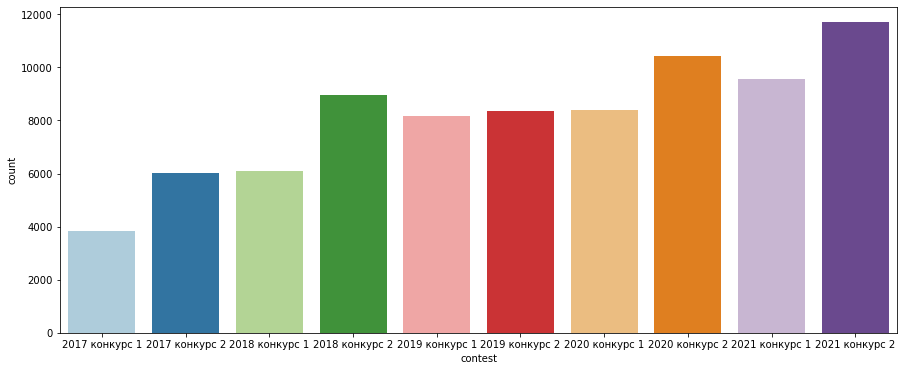

In [931]:
contest_order = sorted(grants.contest.unique().tolist())

plt.figure(figsize=(15,6))
plot1 = sns.countplot(grants.contest, order=contest_order, palette="Paired")

--- Заявки по регионам ---

In [932]:
# подгружаем данные Росстата о кол-ве населения по субъектам РФ

population_data = pd.read_csv('rosstat.csv', sep=';')

In [933]:
# топ-10 регионов по кол-ву заявок

applications_by_region = grants.groupby('region', as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'total_applications'}) \
    .sort_values('total_applications', ascending=False) \
    .merge(population_data, how='left', on='region')

applications_by_region.head(10)

,region,total_applications,population_jan_2021
0,Москва,11416,12655050
1,Санкт-Петербург,3702,5384342
2,Волгоградская область,3455,2474556
3,Республика Башкортостан,2858,4013786
4,Республика Татарстан,2593,3894120
5,Белгородская область,2531,1541259
6,Свердловская область,2246,4290067
7,Самарская область,1701,3154164
8,Иркутская область,1679,2375021
9,Московская область,1641,7708499


In [934]:
# рейтинг активности регионов по кол-ву заявок на 10 тыс. жителей

pd.set_option('display.max_rows', 100)

applications_by_region['applications_per_residents'] = round(applications_by_region.total_applications / applications_by_region.population_jan_2021, 4)

applications_by_region.sort_values('applications_per_residents', ascending=False)

,region,total_applications,population_jan_2021,applications_per_residents
51,Республика Алтай,486,220954,0.0022
82,Ненецкий автономный округ,71,44389,0.0016
5,Белгородская область,2531,1541259,0.0016
2,Волгоградская область,3455,2474556,0.0014
29,Республика Карелия,827,609071,0.0014
25,Республика Саха /Якутия/,1054,981971,0.0011
31,Республика Мордовия,793,778965,0.0010
43,Ямало-Ненецкий автономный округ,574,547010,0.0010
0,Москва,11416,12655050,0.0009
11,Ханты-Мансийский автономный округ - Югра,1498,1687654,0.0009


--- Заявки по направлениям ---

In [935]:
grants['contest_year'] = grants.contest.str.split(expand=True)[0]

In [936]:
grants_by_directions = grants.groupby('direction', as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'total_applications'})

In [937]:
# кол-во заявок по годам в разрезе по направлениям

directions_by_year = grants.groupby(['direction', 'contest_year'], as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'applications'}) \
    .pivot(index='direction', columns='contest_year', values='applications') \
    .reset_index() \
    .merge(grants_by_directions, on='direction') \
    .sort_values('total_applications', ascending=False)

directions_by_year

,direction,2017,2018,2019,2020,2021,total_applications
2,"Охрана здоровья граждан, пропаганда здорового ...",1518.0000,2461.0000,2727.0000,3176.0000,3944.0000,13826
6,"Поддержка проектов в области науки, образовани...",1343.0000,2042.0000,2115.0000,2330.0000,2592.0000,10422
11,"Социальное обслуживание, социальная поддержка ...",1270.0000,1951.0000,2017.0000,2349.0000,2781.0000,10368
10,Сохранение исторической памяти,1029.0000,1589.0000,1988.0000,2593.0000,2555.0000,9754
5,Поддержка проектов в области культуры и искусства,871.0000,1548.0000,1952.0000,2243.0000,2684.0000,9298
7,"Поддержка семьи, материнства, отцовства и дет...",805.0000,1314.0000,1494.0000,1608.0000,2039.0000,7260
4,"Поддержка молодежных проектов, реализация кото...",854.0000,1069.0000,1135.0000,1221.0000,1281.0000,5560
8,Развитие институтов гражданского общества,738.0000,977.0000,1011.0000,996.0000,1049.0000,4771
3,Охрана окружающей среды и защита животных,350.0000,521.0000,596.0000,780.0000,936.0000,3183
12,Укрепление межнационального и межрелигиозного ...,458.0000,588.0000,563.0000,525.0000,554.0000,2688


In [938]:
# показатели годового прироста + "2020 vs 2017" (2021 исключаем, т.к. данные за год неполные)

directions_by_year['YoY18'] = (directions_by_year['2018'] / directions_by_year['2017'] - 1).mul(100).round(1)
directions_by_year['YoY19'] = (directions_by_year['2019'] / directions_by_year['2018'] - 1).mul(100).round(1)
directions_by_year['YoY20'] = (directions_by_year['2020'] / directions_by_year['2019'] - 1).mul(100).round(1)
directions_by_year['2020vs2017'] = (directions_by_year['2020'] / directions_by_year['2017'] - 1).mul(100).round(1)

directions_by_year.sort_values('2020vs2017', ascending=False)

,direction,2017,2018,2019,2020,2021,total_applications,YoY18,YoY19,YoY20,2020vs2017
5,Поддержка проектов в области культуры и искусства,871.0000,1548.0000,1952.0000,2243.0000,2684.0000,9298,77.7000,26.1000,14.9000,157.5000
10,Сохранение исторической памяти,1029.0000,1589.0000,1988.0000,2593.0000,2555.0000,9754,54.4000,25.1000,30.4000,152.0000
3,Охрана окружающей среды и защита животных,350.0000,521.0000,596.0000,780.0000,936.0000,3183,48.9000,14.4000,30.9000,122.9000
2,"Охрана здоровья граждан, пропаганда здорового ...",1518.0000,2461.0000,2727.0000,3176.0000,3944.0000,13826,62.1000,10.8000,16.5000,109.2000
7,"Поддержка семьи, материнства, отцовства и дет...",805.0000,1314.0000,1494.0000,1608.0000,2039.0000,7260,63.2000,13.7000,7.6000,99.8000
9,Развитие общественной дипломатии и поддержка с...,200.0000,343.0000,347.0000,385.0000,289.0000,1564,71.5000,1.2000,11.0000,92.5000
11,"Социальное обслуживание, социальная поддержка ...",1270.0000,1951.0000,2017.0000,2349.0000,2781.0000,10368,53.6000,3.4000,16.5000,85.0000
6,"Поддержка проектов в области науки, образовани...",1343.0000,2042.0000,2115.0000,2330.0000,2592.0000,10422,52.0000,3.6000,10.2000,73.5000
4,"Поддержка молодежных проектов, реализация кото...",854.0000,1069.0000,1135.0000,1221.0000,1281.0000,5560,25.2000,6.2000,7.6000,43.0000
8,Развитие институтов гражданского общества,738.0000,977.0000,1011.0000,996.0000,1049.0000,4771,32.4000,3.5000,-1.5000,35.0000


In [939]:
directions_by_year_graph = directions_by_year.head(10)[['direction', '2017', '2018', '2019', '2020', '2021']].set_index('direction').transpose()

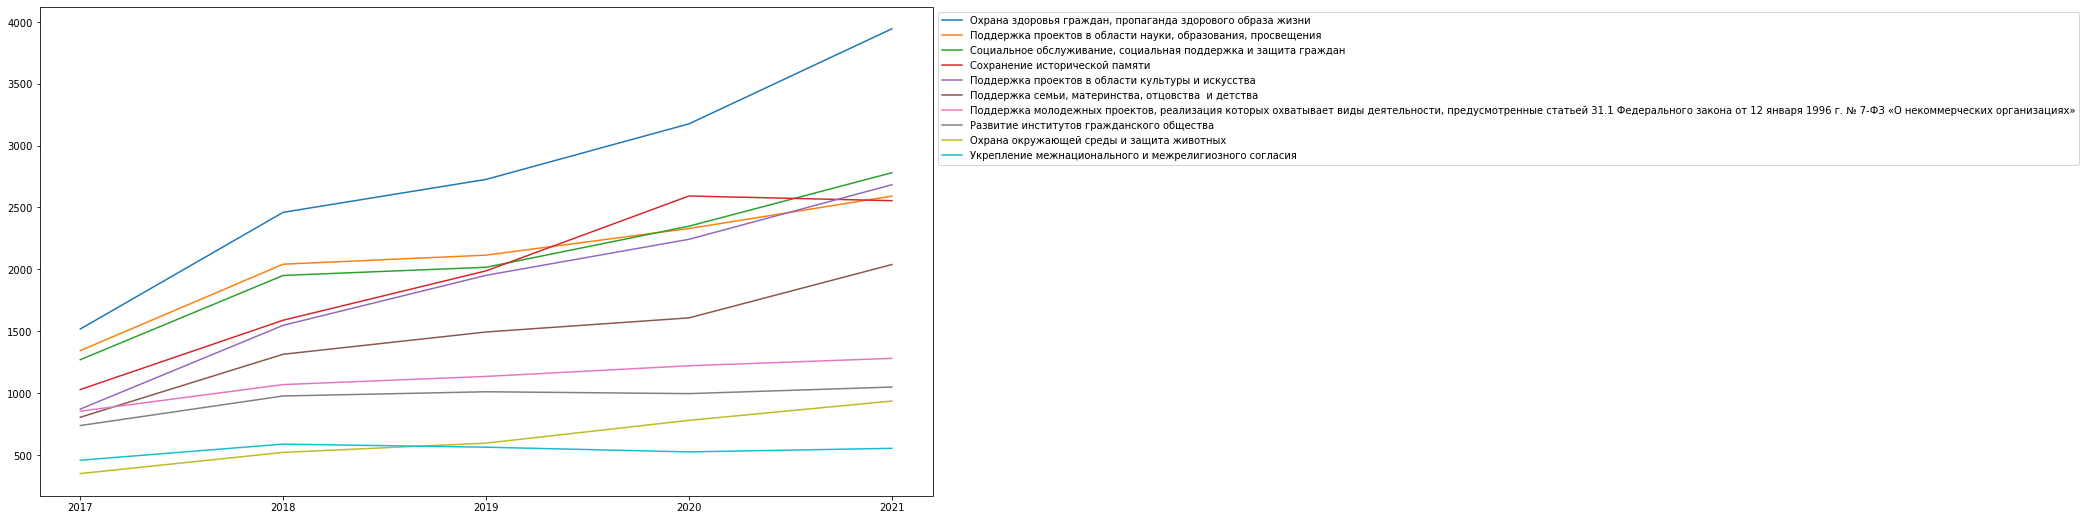

In [940]:
plt.figure(figsize=(16,9))

g = sns.lineplot(data=directions_by_year_graph, dashes=False)
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

--- Гранты ---

In [941]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [942]:
# описательные статистики распределения размера запрашиваемых грантов

grants.grant.describe()

count        81490.0000
mean       2712367.4764
std       30994158.9515
min             17.0000
25%         499335.0000
50%        1400000.0000
75%        2915698.0000
max     7472786130.0000
Name: grant, dtype: float64

In [943]:
# 99-ый процентиль

grants.grant.quantile(q=0.99)

17343362.48000002

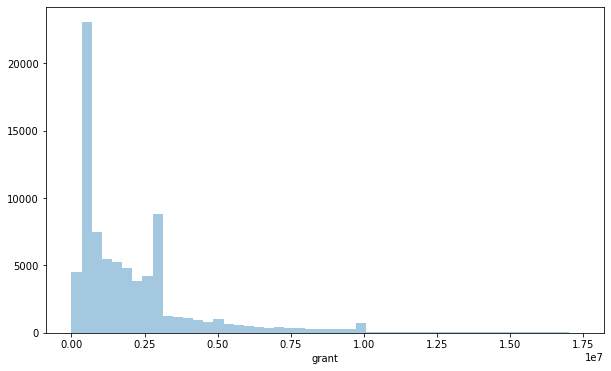

In [944]:
# распределение

plt.figure(figsize=(10,6))
sns.distplot(grants[grants.grant < grants.grant.quantile(q=0.99)].grant, kde=False)

In [945]:
# описательные статистики по годам

grants.groupby('contest_year').grant.describe()

,count,mean,std,min,25%,50%,75%,max
contest_year,,,,,,,,
2017,9848.0000,3705558.5148,32608598.2293,2010.0000,791486.0250,1959612.5000,3000000.0000,2120000000.0000
2018,15024.0000,2709729.0582,6501862.3189,17.0000,499968.0000,1602940.5000,2963522.7500,400000000.0000
2019,16530.0000,2956489.0705,59216063.0066,545.0000,499400.0000,1378329.0000,2904130.0000,7472786130.0000
2020,18822.0000,2326641.2357,6237612.7954,5310.0000,498319.0000,1212503.0000,2806019.7500,535680810.0000
2021,21266.0000,2405939.5444,19955748.4395,5310.0000,498001.0000,1172387.8000,2773948.0000,2801031885.0000


In [946]:
# топ-5 победителей с самыми крупными запрашиваемыми грантами

grants[grants.status == 'победитель конкурса'].sort_values('grant', ascending=False).head(5)

,url,title,contest,direction,grant,region,status,date,id,contest_year
14833,/public/application/item?id=213549F1-E0C3-474C...,"""Юрий Башмет- молодым дарованиям России""",2021 конкурс 1,Выявление и поддержка молодых талантов в облас...,118734010.0000,Москва,победитель конкурса,2020-10-13,21-1-008502,2021
70123,/public/application/item?id=6cc4d57e-375f-4874...,Национальный молодежный симфонический оркестр ...,2018 конкурс 1,Выявление и поддержка молодых талантов в облас...,114989423.0000,Москва,победитель конкурса,2018-03-26,18-1-015280,2018
65304,/public/application/item?id=8F1A6DBC-8121-4F27...,"""Юрий Башмет - молодым дарованиям России""",2018 конкурс 2,Выявление и поддержка молодых талантов в облас...,111965000.0000,Москва,победитель конкурса,2018-05-09,18-2-015458,2018
32811,/public/application/item?id=BB299090-06E1-4B4F...,Второе высшее образование для творческих специ...,2020 конкурс 2,Выявление и поддержка молодых талантов в облас...,107993973.0000,Москва,победитель конкурса,2020-01-04,20-2-007073,2020
66667,/public/application/item?id=836C54D2-0BBB-4D18...,"Второе высшее образование, как фактор повышени...",2018 конкурс 2,Выявление и поддержка молодых талантов в облас...,80636578.0000,Москва,победитель конкурса,2018-04-09,18-2-004274,2018


--- Статистика по одобрению заявок ---

In [949]:
grants.groupby('status', as_index=False) \
    .agg({'id': 'count'})

,status,id
0,на независимой экспертизе,11704
1,победитель конкурса,15687
2,проект не получил поддержку,54099


In [950]:
status_tbl = grants.groupby(['contest', 'status'], as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'have_status'}) \
    .merge(applications_by_contest, on='contest')

In [951]:
status_tbl['cr'] = round(status_tbl.have_status / status_tbl.total_applications, 2)

In [952]:
# cr - процент одобренных заявок

status_tbl[status_tbl.status == 'победитель конкурса'] 

,contest,status,have_status,total_applications,cr
0,2017 конкурс 1,победитель конкурса,736,3839,0.1900
2,2017 конкурс 2,победитель конкурса,1613,6009,0.2700
4,2018 конкурс 1,победитель конкурса,1129,6081,0.1900
6,2018 конкурс 2,победитель конкурса,2022,8943,0.2300
8,2019 конкурс 1,победитель конкурса,1644,8183,0.2000
10,2019 конкурс 2,победитель конкурса,2128,8347,0.2500
12,2020 конкурс 1,победитель конкурса,2013,8378,0.2400
14,2020 конкурс 2,победитель конкурса,2402,10444,0.2300
16,2021 конкурс 1,победитель конкурса,2000,9562,0.2100


In [953]:
status_tbl[status_tbl.status == 'победитель конкурса'].cr.describe()

count   9.0000
mean    0.2233
std     0.0278
min     0.1900
25%     0.2000
50%     0.2300
75%     0.2400
max     0.2700
Name: cr, dtype: float64

In [954]:
# статистика полученных грантов по регионам

winners_by_regions = grants[grants.status == 'победитель конкурса'] \
    .groupby('region') \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'winners'}) \
    .merge(applications_by_region[['region', 'total_applications']], on='region')

In [955]:
winners_by_regions['cr'] = (winners_by_regions.winners / winners_by_regions.total_applications).round(2)

In [956]:
winners_by_regions.sort_values('cr', ascending=False)

,region,winners,total_applications,cr
28,Магаданская область,49,132,0.3700
6,Владимирская область,184,550,0.3300
32,Ненецкий автономный округ,21,71,0.3000
34,Новгородская область,105,366,0.2900
5,Брянская область,80,298,0.2700
41,Приморский край,169,623,0.2700
68,Смоленская область,90,346,0.2600
2,Архангельская область,174,670,0.2600
50,Республика Карелия,207,827,0.2500
10,Еврейская автономная область,22,89,0.2500


In [957]:
# chi-square test

stat, p, dof, expected = ss.chi2_contingency(pd.crosstab(grants[grants.status != 'на независимой экспертизе'].region, grants[grants.status != 'на независимой экспертизе'].status))

In [958]:
stat, p

(798.7171456663099, 5.484505871091431e-117)

In [959]:
# статистика полученных грантов по направлениям

winners_by_direction = grants[grants.status == 'победитель конкурса'] \
    .groupby('direction') \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'winners'}) \
    .merge(directions_by_year[['direction', 'total_applications']], on='direction')

In [960]:
winners_by_direction['cr'] = (winners_by_direction.winners / winners_by_direction.total_applications).round(2)

In [962]:
winners_by_direction.sort_values('cr', ascending=False)

,direction,winners,total_applications,cr
0,Выявление и поддержка молодых талантов в облас...,122,377,0.3200
3,Охрана окружающей среды и защита животных,792,3183,0.2500
9,Развитие общественной дипломатии и поддержка с...,339,1564,0.2200
1,"Защита прав и свобод человека и гражданина, в ...",496,2419,0.2100
11,"Социальное обслуживание, социальная поддержка ...",2188,10368,0.2100
7,"Поддержка семьи, материнства, отцовства и дет...",1479,7260,0.2000
10,Сохранение исторической памяти,1964,9754,0.2000
5,Поддержка проектов в области культуры и искусства,1744,9298,0.1900
2,"Охрана здоровья граждан, пропаганда здорового ...",2517,13826,0.1800
4,"Поддержка молодежных проектов, реализация кото...",986,5560,0.1800


In [963]:
# chi-square test

stat, p, dof, expected = ss.chi2_contingency(pd.crosstab(grants[grants.status != 'на независимой экспертизе'].direction, grants[grants.status != 'на независимой экспертизе'].status))

In [964]:
stat, p

(275.20624666038276, 7.406891894595206e-52)

In [965]:
direction_vs_status = pd.crosstab(grants[grants.status != 'на независимой экспертизе'].direction, grants[grants.status != 'на независимой экспертизе'].status)

In [966]:
direction_vs_status

status,победитель конкурса,проект не получил поддержку
direction,,
Выявление и поддержка молодых талантов в области культуры и искусства,122,179
"Защита прав и свобод человека и гражданина, в том числе защита прав заключенных",496,1692
"Охрана здоровья граждан, пропаганда здорового образа жизни",2517,9077
Охрана окружающей среды и защита животных,792,1870
"Поддержка молодежных проектов, реализация которых охватывает виды деятельности, предусмотренные статьей 31.1 Федерального закона от 12 января 1996 г. № 7-ФЗ «О некоммерческих организациях»",986,3881
Поддержка проектов в области культуры и искусства,1744,6029
"Поддержка проектов в области науки, образования, просвещения",1838,7134
"Поддержка семьи, материнства, отцовства и детства",1479,4672
Развитие институтов гражданского общества,810,3414


In [967]:
stat, p, df, exp = ss.chi2_contingency(direction_vs_status)

stat, p

(275.20624666038276, 7.406891894595206e-52)

In [968]:
# Post Hoc Residuals Test By P. Stikker

colTotals = direction_vs_status.sum()
nCols = len(colTotals)

nCols, colTotals

(2,
 status
 победитель конкурса            15687
 проект не получил поддержку    54099
 dtype: int64)

In [969]:
rowTotals = direction_vs_status.sum(axis=1)
nRows = len(rowTotals)

nRows, rowTotals

(13,
 direction
 Выявление и поддержка молодых талантов в области культуры и искусства                                                                                                                             301
 Защита прав и свобод человека и гражданина, в том числе защита прав заключенных                                                                                                                  2188
 Охрана здоровья граждан, пропаганда здорового образа жизни                                                                                                                                      11594
 Охрана окружающей среды и защита животных                                                                                                                                                        2662
 Поддержка молодежных проектов, реализация которых охватывает виды деятельности, предусмотренные статьей 31.1 Федерального закона от 12 января 1996 г. № 7-ФЗ «О некоммерческих организациях

In [970]:
n = sum(rowTotals)
n

69786

In [971]:
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (direction_vs_status.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        print(AdjRes)

7.519191772917779
-7.51919177291778
0.21675745120582973
-0.21675745120582673
-2.1728065557853333
2.172806555785322
9.16615546086955
-9.166155460869549
-3.8463890432515826
3.8463890432515737
-0.09428161485618966
0.0942816148561831
-4.843805381071358
4.843805381071357
3.0813860486990268
-3.0813860486990263
-5.304905620489943
5.304905620489946
1.406160752845907
-1.4061607528459141
2.3995435780509955
-2.3995435780509884
5.011793465951933
-5.011793465951938
-6.095174476296229
6.095174476296221


In [972]:
phRes = pd.DataFrame(columns=['ContestDirection', 'ProjectStatus', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (direction_vs_status.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'ContestDirection':direction_vs_status.index[i], 'ProjectStatus':direction_vs_status.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

phRes

,ContestDirection,ProjectStatus,Adj. Res.
0,Выявление и поддержка молодых талантов в облас...,победитель конкурса,7.5192
1,Выявление и поддержка молодых талантов в облас...,проект не получил поддержку,-7.5192
2,"Защита прав и свобод человека и гражданина, в ...",победитель конкурса,0.2168
3,"Защита прав и свобод человека и гражданина, в ...",проект не получил поддержку,-0.2168
4,"Охрана здоровья граждан, пропаганда здорового ...",победитель конкурса,-2.1728
5,"Охрана здоровья граждан, пропаганда здорового ...",проект не получил поддержку,2.1728
6,Охрана окружающей среды и защита животных,победитель конкурса,9.1662
7,Охрана окружающей среды и защита животных,проект не получил поддержку,-9.1662
8,"Поддержка молодежных проектов, реализация кото...",победитель конкурса,-3.8464
9,"Поддержка молодежных проектов, реализация кото...",проект не получил поддержку,3.8464


In [973]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes

,ContestDirection,ProjectStatus,Adj. Res.,Sig.
0,Выявление и поддержка молодых талантов в облас...,победитель конкурса,7.5192,0.0000
1,Выявление и поддержка молодых талантов в облас...,проект не получил поддержку,-7.5192,0.0000
2,"Защита прав и свобод человека и гражданина, в ...",победитель конкурса,0.2168,0.8284
3,"Защита прав и свобод человека и гражданина, в ...",проект не получил поддержку,-0.2168,0.8284
4,"Охрана здоровья граждан, пропаганда здорового ...",победитель конкурса,-2.1728,0.0298
5,"Охрана здоровья граждан, пропаганда здорового ...",проект не получил поддержку,2.1728,0.0298
6,Охрана окружающей среды и защита животных,победитель конкурса,9.1662,0.0000
7,Охрана окружающей среды и защита животных,проект не получил поддержку,-9.1662,0.0000
8,"Поддержка молодежных проектов, реализация кото...",победитель конкурса,-3.8464,0.0001
9,"Поддержка молодежных проектов, реализация кото...",проект не получил поддержку,3.8464,0.0001


In [974]:
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
phRes

,ContestDirection,ProjectStatus,Adj. Res.,Sig.,Adj. Sig.
0,Выявление и поддержка молодых талантов в облас...,победитель конкурса,7.5192,0.0000,0.0000
1,Выявление и поддержка молодых талантов в облас...,проект не получил поддержку,-7.5192,0.0000,0.0000
2,"Защита прав и свобод человека и гражданина, в ...",победитель конкурса,0.2168,0.8284,21.5383
3,"Защита прав и свобод человека и гражданина, в ...",проект не получил поддержку,-0.2168,0.8284,21.5383
4,"Охрана здоровья граждан, пропаганда здорового ...",победитель конкурса,-2.1728,0.0298,0.7747
5,"Охрана здоровья граждан, пропаганда здорового ...",проект не получил поддержку,2.1728,0.0298,0.7747
6,Охрана окружающей среды и защита животных,победитель конкурса,9.1662,0.0000,0.0000
7,Охрана окружающей среды и защита животных,проект не получил поддержку,-9.1662,0.0000,0.0000
8,"Поддержка молодежных проектов, реализация кото...",победитель конкурса,-3.8464,0.0001,0.0031
9,"Поддержка молодежных проектов, реализация кото...",проект не получил поддержку,3.8464,0.0001,0.0031


In [975]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1
phRes

,ContestDirection,ProjectStatus,Adj. Res.,Sig.,Adj. Sig.
0,Выявление и поддержка молодых талантов в облас...,победитель конкурса,7.5192,0.0000,0.0000
1,Выявление и поддержка молодых талантов в облас...,проект не получил поддержку,-7.5192,0.0000,0.0000
2,"Защита прав и свобод человека и гражданина, в ...",победитель конкурса,0.2168,0.8284,1.0000
3,"Защита прав и свобод человека и гражданина, в ...",проект не получил поддержку,-0.2168,0.8284,1.0000
4,"Охрана здоровья граждан, пропаганда здорового ...",победитель конкурса,-2.1728,0.0298,0.7747
5,"Охрана здоровья граждан, пропаганда здорового ...",проект не получил поддержку,2.1728,0.0298,0.7747
6,Охрана окружающей среды и защита животных,победитель конкурса,9.1662,0.0000,0.0000
7,Охрана окружающей среды и защита животных,проект не получил поддержку,-9.1662,0.0000,0.0000
8,"Поддержка молодежных проектов, реализация кото...",победитель конкурса,-3.8464,0.0001,0.0031
9,"Поддержка молодежных проектов, реализация кото...",проект не получил поддержку,3.8464,0.0001,0.0031
